In [1]:
# Import Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_original = df.copy()

Text(0.5, 1.0, 'Work From Home')

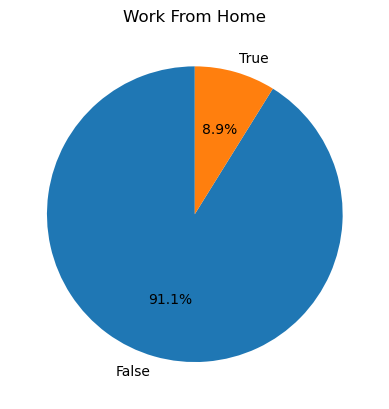

In [21]:
df_original['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.ylabel("")
plt.title('Work From Home')

Text(0.5, 1.0, 'Fields of Advertised Jobs')

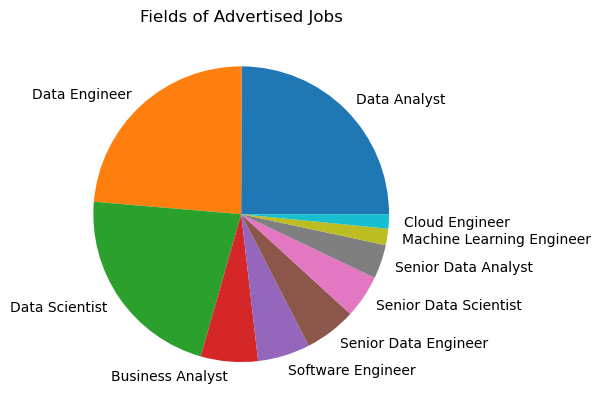

In [ ]:
df_original['job_title_short'].value_counts().plot(kind='pie') # not great because its hard to actually tell which field has the most jobs postings. 
plt.ylabel("")
plt.title('Fields of Advertised Jobs')
plt.show()

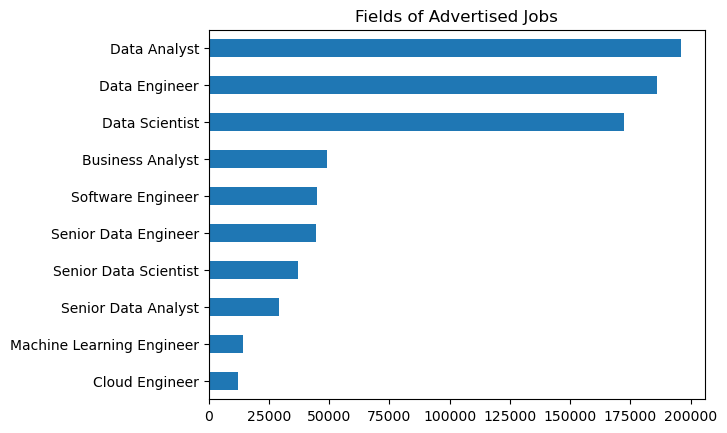

In [14]:
#Compare above pie chart to the horisontal bar chart below 
df_original['job_title_short'].value_counts().plot(kind='barh') 
plt.ylabel("")
plt.title('Fields of Advertised Jobs')
plt.gca().invert_yaxis()
plt.show()

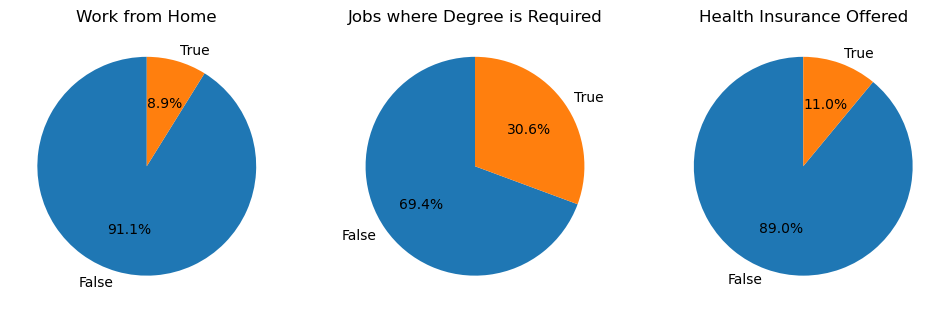

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

dict_column = { 
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Jobs where Degree is Required',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_original[column].value_counts(), startangle=90, autopct='%1.1f%%', labels= ['False', 'True'])
    ax[i].set_title(title)

plt.show()
